# Assignment 7 Section 1 

In [1]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    print("Successful imported")
except:
    print("Something went wrong")

Successful imported


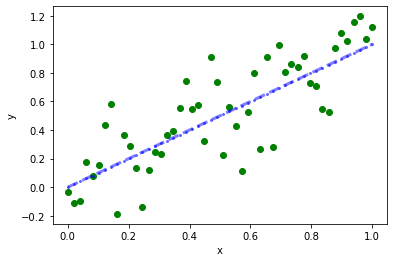

In [2]:
# Generating the dataset
def predictions(x,add_noise=False,mean=0,var=0.25):
    if not add_noise: return x
    
    return x + np.random.normal(mean,var,x.shape)
    
x = np.linspace(-1,5,50)*1000 # Assignment 7 section 1. Change here the value of x i.e., multiply by 1000.

#normalizing x
x_transform = []
for i in range(len(x)):
    x_transform.append((x[i]-min(x))/(max(x)-min(x)))
x_transform = np.array(x_transform)
y = predictions(x_transform,True)

plt.scatter(x_transform,y,color = "green")
plt.plot(x_transform,x_transform,'bo--',linewidth = 3,markersize = 2,alpha = 0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
# Mean square error
def mse(yt,yp):
    return np.mean((yt-yp)**2) / 2

def updates(yt,yp,x,lr,m,c):
    m = m - (-1)*lr*np.mean((yt-yp)*x)
    c = c - (-1)*lr*np.mean(yt-yp)

    return m,c

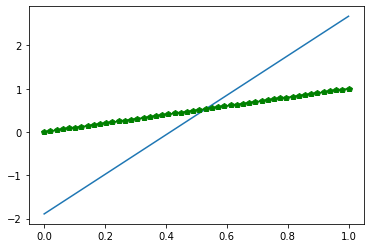

(0.572641974348351, 13.544956517729549)

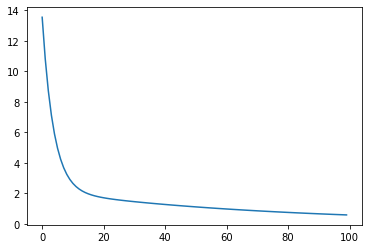

In [4]:
m,c = 10,0
lr = 0.1
total_loss = []
for i in range(100):
    yp = m*x_transform + c    
    loss = mse(y,yp)
    total_loss.append(loss)
    m,c = updates(y,yp,x_transform,lr,m,c)
plt.plot(x_transform,yp,label=i+1)

plt.plot(x_transform,x_transform,color='green',marker='p')
plt.show()

plt.plot(total_loss)
total_loss[-1], total_loss[0]

# Assignment 7 Section 2

In [5]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    print("Successful imported")
except:
    print("Something went wrong")

Successful imported


In [6]:
data = pd.read_csv('Data.csv')
print(data.head())
x1 = data.drop(['price','date','street', 'city','statezip', 'country'], axis = 1).to_numpy()
x = np.mean(x1, axis = 1)
y = data['price'].to_numpy()
np.shape(x),np.shape(y)

               date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 00:00   313000.0         3       1.50         1340      7912   
1  02-05-2014 00:00  2384000.0         5       2.50         3650      9050   
2  02-05-2014 00:00   342000.0         3       2.00         1930     11947   
3  02-05-2014 00:00   420000.0         3       2.25         2000      8030   
4  02-05-2014 00:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  st

((4600,), (4600,))

In [7]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

N = len(x)
x_mean,y_mean = x.mean(),y.mean()
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den
B0 = y_mean - (B1 * x_mean)
print(B1,B0)

13.396966754826769 527489.6575826951


In [8]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 527489.6575826951 + 13.397β
Correlation Coef.:  0.0719261704628175
"Goodness of Fit":  0.005173373997446281


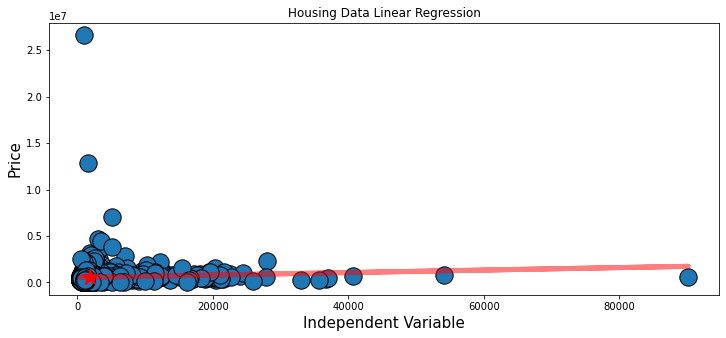

In [9]:
plt.figure(figsize=(12,5))
plt.scatter(x,y, s=300, linewidths=1, edgecolor='black')
plt.title('Housing Data Linear Regression')
plt.xlabel('Independent Variable', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point